<a href="https://colab.research.google.com/github/Jorge2018/prediccion_ventas/blob/main/prediccion_ventas08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
df=pd.read_csv(r'https://raw.githubusercontent.com/Jorge2018/RepositorioArchivos/main/diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Inspeccion de datos**

In [63]:
df.duplicated()
df = df.drop_duplicates()
print('la cantidad de registros sin duplicados es:\n',df.count())
print('---------------------------')
print('los datos faltantes del df son:\n',df.isna().sum())
print('---------------------------')

la cantidad de registros sin duplicados es:
 Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64
---------------------------
los datos faltantes del df son:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
---------------------------


In [64]:
df.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

**Separa valores en X, y**

In [65]:
# Dividan
X = df.drop('BMI', axis=1)
#X_sel = X.select_dtypes(include = ["number"])
y = df['BMI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

# Proceso para realizar transformaciones al df

In [66]:
## **Instanciar selectores**
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

## Instanciar transformadores SimpleImputer, StandardScaler y OneHotEncoder
# Imputers
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

## **Instanciar el pipeline**
numeric_pipe = make_pipeline(mean_imputer, scaler)
categorical_pipe = make_pipeline(freq_imputer, ohe)

## **Asignacion de tupla e instanciacion de ColumnTransformer**
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)

## **Transformacion de datos**
# fit on train
preprocessor.fit(X_train,X_test)
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)


**Inspeccion de resultados**

In [67]:
# Comprueben los valores faltantes y que los datos se escalen y tengan una codificación one-hot
print(np.isnan(X_train_processed).sum().sum(), 'valores perdidos en la data de entrenamiento')
print(np.isnan(X_test_processed).sum().sum(), 'valores perdidos en la data de prueba')
print('\n')
print('Todos los datos procesados del X_train_processed son del tipo:', X_train_processed.dtype)
print('Todos los datos procesados del X_test_processed son del tipo', X_test_processed.dtype)
print('\n')
print('shape de los datos de entrenamiento son', X_train_processed.shape)
print('\n')
print('shape de los datos de test son', X_test_processed.shape)


0 valores perdidos en la data de entrenamiento
0 valores perdidos en la data de prueba


Todos los datos procesados del X_train_processed son del tipo: float64
Todos los datos procesados del X_test_processed son del tipo float64


shape de los datos de entrenamiento son (537, 8)


shape de los datos de test son (231, 8)


**Instancia y proceso del modelo**

In [71]:
reg = LinearRegression()
reg.fit(X_train_processed,y_train)
print('El bias calculado es', reg.intercept_)
print('La pendiente calculada es: ', reg.coef_)
print('\n')
print('Esto significa que por cada 31/32 unidad de BMI, el cambio en la pendiente de cada una de sus caracteristicas seran los valores que nos retorna el coef.')

El bias calculado es 31.980446927374302
La pendiente calculada es:  [-0.09497721  0.62453994  1.8760797   2.54546597 -0.24240984  0.04510644
 -0.46189587  1.8069783 ]


Esto significa que por cada 31/32 unidad de BMI, el cambio en la pendiente de cada una de sus caracteristicas seran los valores que nos retorna el coef.


Comparativa entre valor real y la prediccion realizada 

In [59]:
y_pred = reg.predict(X_test_processed)
dfinfo = pd.DataFrame({'Real': y_test.values.flatten(), 'Prediccion': y_pred.flatten()})
dfinfo

,Real,Prediccion
0,31.6,26.889574
1,40.5,35.805304
2,24.3,26.972058
3,33.3,35.978722
4,31.2,29.406950
...,...,...
226,47.9,35.770454
227,35.8,32.392414
228,28.6,30.747547
229,28.3,37.850799


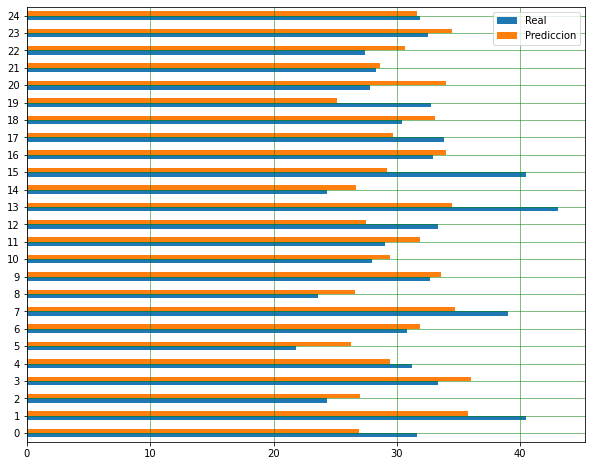

In [61]:
grafo = dfinfo.head(25)
grafo.plot(kind='barh',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Codigo para obtener el R cuadrado (R^2), despues de realizado el ajuste sobre los datos de entrenamiento

In [50]:
train_score = reg.score(X_train_processed, y_train)
print(train_score)

0.2727405655214459


Codigo para obtener el R cuadrado (R^2), despues de realizado el ajuste sobre los datos de prueba

In [51]:
test_score = reg.score(X_test_processed,y_test) # Este valor sale negativo no esta claro el porque
print(test_score)

0.2503867137537683


Codigo para obtener las predicciones de los datos de Entrenamiento y prueba

In [52]:
# Obtengan las predicciones del conjunto de entrenamiento
train_preds = reg.predict(X_train_processed)
# Obtengan las predicciones del conjunto de prueba
test_preds = reg.predict(X_test_processed)

Error absoluto medio (EAM)

In [53]:
mae_train = mean_absolute_error(y_train, train_preds) # Como se interpretan estos valores?
mae_test = mean_absolute_error(y_test, test_preds)    # Como se interpretan estos valores?
print(mae_train)
print(mae_test)

5.030440195050508
5.030191778577065


Error cuadratico medio (ECM)

In [54]:
mse_train = mean_squared_error(y_train, train_preds) # Como se interpretan estos valores?
mse_test = mean_squared_error(y_test, test_preds)    # Como se interpretan estos valores?
print(mse_train)
print(mse_test)

45.365583125750796
46.0120431716701


Raiz del error cuadratico medio (RECM)

In [55]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds)) # Como se interpretan estos valores?
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))    # Como se interpretan estos valores?
print(rmse_train)
print(rmse_test)

6.735397770417928
6.783217759416994
